In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io 

#### Importing Dataset

In [2]:
dataset = pd.read_csv('F://Data_set/cancer_datasets.csv') 

In [3]:
dataset.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
#dataset.drop(labels=['id','Unnamed: 32'],axis=1) 

#### Divide the Dataset into dependent and independent Variable

In [4]:
x = dataset.drop(labels=['id','diagnosis','Unnamed: 32'],axis=1)   

In [5]:
y = dataset['diagnosis'] 

#### Encoding Categorical Data

In [6]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
le = LabelEncoder()

y = le.fit_transform(y) 

#### Spliting the Dataset into traning set and test set

In [8]:
from sklearn.model_selection import train_test_split 

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  

#### Feature Scaling

In [10]:
#from sklearn.preprocessing import StandardScaler 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test)  

In [11]:
x_train 

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [12]:
x_test 

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

#### Build ANN Model

In [13]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


#### Drop out method

In [16]:
from keras.layers import Dropout

In [17]:
#drop = Dropout() 

In [19]:
model = Sequential() 

Create first input Layer

In [20]:
model.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30)) 

# Adding Dropout
model.add(Dropout(p=1.0))

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  after removing the cwd from sys.path.


Adding Second Layer

In [21]:
model.add(Dense(output_dim=16,init='uniform',activation='relu'))
# Adding Dropout
model.add(Dropout(p=1.0))

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  This is separate from the ipykernel package so we can avoid doing imports until


Adding the Output Layer

In [22]:
model.add(Dense(output_dim = 1,init='uniform',activation='sigmoid')) 

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


Compile Our ANN Model 

In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 

#### Traning and Testing of Our Model With Epoch

In [24]:
model.fit(x_train,y_train,batch_size=100,nb_epoch=150) 

C:\Users\Nakul Raje\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5846
Epoch 2/150
455/455 [==============================] - 0s 29us/step - loss: 0.6911 - accuracy: 0.6967
Epoch 3/150
455/455 [==============================] - 0s 31us/step - loss: 0.6885 - accuracy: 0.7978
Epoch 4/150
455/455 [==============================] - 0s 31us/step - loss: 0.6847 - accuracy: 0.8571
Epoch 5/150
455/455 [==============================] - 0s 33us/step - loss: 0.6792 - accuracy: 0.9165
Epoch 6/150
455/455 [==============================] - 0s 29us/step - loss: 0.6712 - accuracy: 0.9297
Epoch 7/150
455/455 [==============================] - 0s 35us/step - loss: 0.6601 - accuracy: 0.9275
Epoch 8/150
455/455 [==============================] - 0s 31us/step - loss: 0.6446 - accuracy: 0.9363
Epoch 9/150
455/455 [==============================] - 0s 33us/step - loss: 0.6241 - accuracy: 0.9385
Epoch 10/150
455/455 [==============================] - 0s 35us/step - loss: 0.5974

455/455 [==============================] - 0s 33us/step - loss: 0.0487 - accuracy: 0.9890
Epoch 81/150
455/455 [==============================] - 0s 35us/step - loss: 0.0483 - accuracy: 0.9890
Epoch 82/150
455/455 [==============================] - 0s 33us/step - loss: 0.0480 - accuracy: 0.9890
Epoch 83/150
455/455 [==============================] - 0s 37us/step - loss: 0.0476 - accuracy: 0.9890
Epoch 84/150
455/455 [==============================] - 0s 33us/step - loss: 0.0473 - accuracy: 0.9890
Epoch 85/150
455/455 [==============================] - 0s 42us/step - loss: 0.0470 - accuracy: 0.9890
Epoch 86/150
455/455 [==============================] - 0s 35us/step - loss: 0.0467 - accuracy: 0.9890
Epoch 87/150
455/455 [==============================] - 0s 35us/step - loss: 0.0463 - accuracy: 0.9890
Epoch 88/150
455/455 [==============================] - 0s 37us/step - loss: 0.0460 - accuracy: 0.9890
Epoch 89/150
455/455 [==============================] - 0s 37us/step - loss: 0.0457 - 

In [25]:
print(x_test) 

[[-0.22609091  0.14299357 -0.16219992 ...  1.33438591  1.22101459
   1.32977555]
 [-0.28072076  1.13113906 -0.34954245 ... -0.81952682 -0.77541863
  -0.94570364]
 [-0.04782508 -0.87231025 -0.12299829 ... -0.49120548 -1.31433312
  -0.98696059]
 ...
 [ 1.7233322  -0.06173848  1.70132185 ...  1.51554921  0.25341812
  -0.26496405]
 [ 1.18565945  0.15552818  1.16487847 ...  0.53103066  0.32690646
  -0.37709831]
 [ 0.24545096 -0.64668718  0.25416267 ... -0.19956228 -1.2425945
  -0.01424877]]


#### Predicting the test set result

In [26]:
y_pred = model.predict(x_test) 

y_pred = (y_pred>0.5)

#### Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix 

In [28]:
cm = confusion_matrix(y_test,y_pred) 

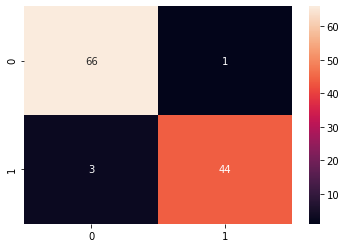

In [29]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [35]:
# First Accuracy after traning

(65+44)/114 

0.956140350877193

In [ ]:
(64+44)/114 